In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 448 kB 68.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import nltk
from konlpy.corpus import kobill
import pandas as pd
files_ko = kobill.fileids()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/공모전/tmp/test_set_final.csv')
df2 = pd.read_csv('/content/drive/MyDrive/공모전/tmp/hotel_review_label1.csv')

In [ ]:
df1 = df1[['stay_date', 'review', 'score']]
df2 = df2[['stay_date', 'review', 'score']]
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [ ]:
df

,stay_date,review,score
0,2021-07-01,이그제큐티브 라운지 칵테일 뷔페는 생각보다 넘 별로였어요 메뉴가 얼마 없어서 ifc...,50
1,2021-07-01,직원분들 모두들 너무 친전하셨고 말하지 않아도 무엇이 필요한지 먼저 오퍼해 주셨어요...,50
2,2021-07-01,가격대비 메리크가 없으며 이제는 가격을 어느정도 지불해야지만 앞의 조망을 즐길수 있...,20
3,2021-07-01,가족들과 즐거운 여름 휴가를 보낼 수 있었습니다 더운 여름이었지만 11시쯤 걸어다닌...,50
4,2021-07-01,위치 주차 시설 서비스 등 호텔이 제공해야 할 모든면이 편리하고 좋았다 자녀들과 함...,50
...,...,...,...
12969,2021-07-01,화장실 냄새나고 직원불친절 합니다 특히 차량진입 입구 짐내리는곳 티비 동작안되고 5...,20
12970,2021-07-01,개관한지 오래되었으면 특급호텔은 리모델링을 해야하는데 욕실 객실카펫등의 룸컨디션이 ...,10
12971,2021-07-01,구경할수 있는 해안가는 모두 막혀 있고 실내 및 야외 수영장은 모두 마스크 벗고 밀...,10
12972,2021-07-01,올데이라운지 사용이 매우 좋았습니다 올데이라운지를 사용한다면 트로피칼 3단세트를 추...,50


In [ ]:
df['stay_date'] = pd.to_datetime(df['stay_date'])
df.sort_values(by='stay_date', inplace=True)
df.reset_index(inplace=True)

In [ ]:
def func(x):
    d = {}
    d['reviews'] = ' '.join(x['review'])
    d['review_count'] = x['review'].count()
    d['mean_score'] = x['score'].mean()
    return pd.Series(d, index=['reviews', 'review_count', 'mean_score'])

In [ ]:
data = df.groupby(['stay_date']).apply(func)

In [ ]:
data

,reviews,review_count,mean_score
stay_date,,,
2018-06-01,역에서 가까워서 이동하기에도 좋고 조식에 쌀국수랑 오믈렛 완젼 짱짱 맛있었어요 빵도...,174,47.873563
2018-07-01,7월 6월 오후에 거래처 외국인 직원의 투숙을 예약했던 사람입니다 그 친구의 투숙을...,199,46.180905
2018-08-01,여자들끼리 함께하는 여행 여자들끼리 하는 첫 여행 간단하게 부산나들이를 한 후 호텔...,231,46.060606
2018-09-01,내부 외부깔끔 특히 내부가넓고 어메니티가 좋음 인근 식당 및 까페 편의시설보유 지하...,269,45.427509
2018-10-01,객실내부에서 롯데월드가 한눈에 완전최고 전망용 엘리베이터도 굿 여러번 탔네요 다른분...,244,46.844262
2018-11-01,토요일부터 2박으로 신화제주월드에서 숙박했어요 프로트도 친절하시고 음식 침구 모두 ...,356,47.500000
2018-12-01,이번에 친구들이랑 서울에 놀러오게되서 값싸고 좋은 호텔을 찾다가 신라스테이 마포를 ...,490,47.326531
2019-01-01,방이 너무 깨끗하고 아늑하고 너무 좋네요 고급스러운것도 마찬가지고요 바다전망도 또 ...,650,48.076923
2019-02-01,평범한 룸 평범한 조식 평범한 서비스 평범 무난한 호텔 하지만 오션뷰 룸의 전망은 ...,619,47.479806


In [ ]:
data.reviews[0]

'역에서 가까워서 이동하기에도 좋고 조식에 쌀국수랑 오믈렛 완젼 짱짱 맛있었어요 빵도 완젼 맛나요 다음에도 꼭 오고 싶어요 구로에서 숙박을 해야할 경우 신라스테이 종종 이용하는데 갈때마다 가격대비 깔끔함과 편의성에 만족스럽게 이용하네요 호텔 도착하니 아늑해보이는 로비와 배정받은 객실의 침구가 너무 푹신하여 편안히 투숙할 수 있었습니다 Cafe 쌀국수는 더할 나위없이 맛있고 직원들의 서비스 마인드가 아주 좋은 호텔 다음에 또 이용하러 올께요 평소 신라스테이 자주 이용하는데 구로도 좋네요 어느 신라스테이를 가더라도 모든 직원들이 친절하고 가격도 괜찮아서 만족하고 있습니다 호캉스하러 신라스테이 다른 지점들 투숙해봤는데 이번에는 구로점에 투숙하게됐어요 역시나 신라스테이가 추구하는 모던 심플한 인테리어였고 침대 어메니티 등 부족함이 없었습니다 친절한 직원분들께도 감사의 말씀 남깁니다 재방문 의사 100 고민하시는 분들께 추천합니다 신라스테이 구로를 처음으로 이용해보았는데 아주 편히 쉬다갑니다 모든게 만족 스러운 투숙이였습니다 특히 직원들이 아주 친절하고 인테리어 등이 아주 깔끔하게 잘되어있던거 같아서 매우 만족 이번여름이 가기전에 다시한번 호캉스 즐기러 갈 의사가 있습니다 역시 신라라는 이름에 걸맞는 침구류와 어매니티 짱이였습니다 신라스테이 구로에서 주말 저녁먹었는데 가격대비 만족하고갔습니다 직원들 친절한 응대 서비스와 음식 리필도 계속해서 좋더라고요 재방문 의사 10000입니다  신라스테이는 처음 이용해봤는데 위치가 광화문이라 인사동이랑 경복궁에서도 가깝더라구요  침대도 정말 편안하고 객실도 아늑하고 깔끔해서 편하게 잘 쉬었습니다 직원분들도 다 너무너무 친절하셨는데 미란다씨  정말 넘 친절하셨어요  귀찮게 이것저것 여쭤봤는데도 세세하게 다 알려주시고  감사했습니다  다음번에는 가족들도 같이 투숙하면서 여기저기 둘러봐야겠어요  방이 깔끔한게 제일 좋았고 직원분들이 너무 친절해서 좋았어요 프론트 직원분들한테 여러가지 물어보고 도움 청했는데 기분 좋게 도와주시더라구요 이쪽

In [ ]:
from konlpy.tag import Okt
t = Okt()

In [ ]:
data['tokens'] = data['reviews'].apply(lambda X : t.nouns(X))

In [ ]:
data

,reviews,review_count,mean_score,tokens
stay_date,,,,
2018-06-01,역에서 가까워서 이동하기에도 좋고 조식에 쌀국수랑 오믈렛 완젼 짱짱 맛있었어요 빵도...,174,47.873563,"[역, 이동, 조식, 쌀국수, 오믈렛, 완젼, 짱짱, 빵, 완젼, 맛, 요, 다음,..."
2018-07-01,7월 6월 오후에 거래처 외국인 직원의 투숙을 예약했던 사람입니다 그 친구의 투숙을...,199,46.180905,"[오후, 거래처, 외국인, 직원, 투숙, 예약, 사람, 그, 친구, 투숙, 위해, ..."
2018-08-01,여자들끼리 함께하는 여행 여자들끼리 하는 첫 여행 간단하게 부산나들이를 한 후 호텔...,231,46.060606,"[여자, 끼리, 여행, 여자, 끼리, 첫, 여행, 부산, 나들이, 후, 호텔, 도착..."
2018-09-01,내부 외부깔끔 특히 내부가넓고 어메니티가 좋음 인근 식당 및 까페 편의시설보유 지하...,269,45.427509,"[내부, 외부, 부가, 어메니티, 인근, 식당, 및, 까페, 편의, 시설, 보유, ..."
2018-10-01,객실내부에서 롯데월드가 한눈에 완전최고 전망용 엘리베이터도 굿 여러번 탔네요 다른분...,244,46.844262,"[객실, 내부, 롯데, 월드, 한눈, 완전, 최고, 전망, 용, 엘리베이터, 굿, ..."
2018-11-01,토요일부터 2박으로 신화제주월드에서 숙박했어요 프로트도 친절하시고 음식 침구 모두 ...,356,47.500000,"[토요일, 박, 신화, 제주, 월드, 숙박, 프로트, 음식, 침구, 모두, 수영장,..."
2018-12-01,이번에 친구들이랑 서울에 놀러오게되서 값싸고 좋은 호텔을 찾다가 신라스테이 마포를 ...,490,47.326531,"[이번, 친구, 서울, 호텔, 신라, 스테이, 마포, 프론트, 사람, 조식, 이, ..."
2019-01-01,방이 너무 깨끗하고 아늑하고 너무 좋네요 고급스러운것도 마찬가지고요 바다전망도 또 ...,650,48.076923,"[방이, 마찬가지, 고요, 바다, 전망, 또, 최고, 굿굿, 앞, 해운대, 바다, ..."
2019-02-01,평범한 룸 평범한 조식 평범한 서비스 평범 무난한 호텔 하지만 오션뷰 룸의 전망은 ...,619,47.479806,"[룸, 조식, 서비스, 평범, 무난, 호텔, 오션, 뷰, 룸, 전망, 정말, 호텔,..."


In [ ]:
data.reset_index(inplace=True)

#2021년 8월 데이터 삭제 -> 너무 적은 수의 데이터로 정규화 오류 예상
data = data.drop(index=38)

data.set_index('stay_date', inplace=True)

In [ ]:
data.review_count.sum()

12971

In [ ]:
#data.to_csv('./token_per_month.csv', encoding='utf-8-sig')

In [ ]:
def topic_count(x, topic):
    num = 0
    for token in x:
        if token in topic:
            num += 1
    return num

In [ ]:
topics = [['침구', '상태', '응대', '프론트', '분위기'], 
          ['바다', '전망', '오션', '야경', '아침', '뷰'], 
          ['침대', '욕조', '화장실', '어메니티', '디럭스'], 
          ['수영장', '사우나', '수영', '야외', '관리'], 
          ['안내', '인사', '로비', '미소', '배려'],
          ['청소', '냄새', '화장실', '소리', '먼지'],
          ['주변', '근처', '거리', '맛집', '접근성'], 
          ['라운지', '음식', '클럽', '뷔페', '해피아워'], 
          ['주차', '가격', '주차장', '가성', '로비'],
          ['고객', '프론트', '응대', '요청', '전화']]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dt_topic = []
topic_reg = []
for topic in topics:  
    print(topic)
    d = data.tokens.apply(topic_count, topic=topic)
    dt_topic.append(d)
    reg = data.tokens.apply(topic_count, topic=topic) / data.review_count * 100
    topic_reg.append(reg)

['침구', '상태', '응대', '프론트', '분위기']
['바다', '전망', '오션', '야경', '아침', '뷰']
['침대', '욕조', '화장실', '어메니티', '디럭스']
['수영장', '사우나', '수영', '야외', '관리']
['안내', '인사', '로비', '미소', '배려']
['청소', '냄새', '화장실', '소리', '먼지']
['주변', '근처', '거리', '맛집', '접근성']
['라운지', '음식', '클럽', '뷔페', '해피아워']
['주차', '가격', '주차장', '가성', '로비']
['고객', '프론트', '응대', '요청', '전화']


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
topic0

,stay_date,0
0,2018-06-01,41.954023
1,2018-07-01,40.201005
2,2018-08-01,33.766234
3,2018-09-01,47.211896
4,2018-10-01,46.721311
5,2018-11-01,28.370787
6,2018-12-01,32.040816
7,2019-01-01,32.769231
8,2019-02-01,25.525040
9,2019-03-01,30.241935


In [ ]:
for i in range(len(topic_reg)):
    topic_reg[i] = topic_reg[i].iloc[:-1]

In [ ]:
ma = []
for j in range(len(topic_reg)):
    lst = []
    lst.append(topic_reg[j].rolling(7,win_type='gaussian', center=True).mean(std=1))
    ma.append(lst)

In [ ]:
import numpy as np

In [ ]:
maxs = []
for l in range(len(ma)):
    tmp = ma[l][0]
    tmp = np.abs(tmp - tmp.shift(1))
    print(np.argmax(tmp))
    maxs.append(np.argmax(tmp))

5
33
5
27
24
5
12
14
4
24


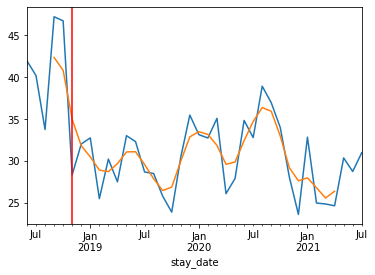

In [ ]:
import matplotlib.pyplot as plt
topic_reg[0].plot()
ma[0][0].plot()
plt.axvline(x=(topic_reg[0].index[maxs[0]]), color='r')

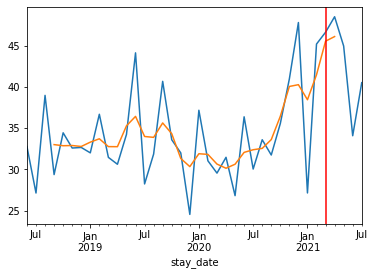

In [ ]:
import matplotlib.pyplot as plt
topic_reg[1].plot()
ma[1][0].plot()
plt.axvline(x=(topic_reg[1].index[maxs[1]]), color='r')

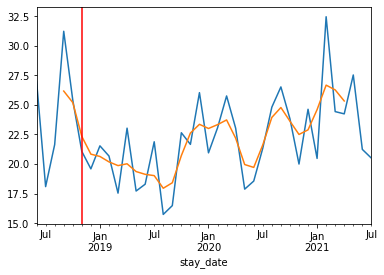

In [ ]:
import matplotlib.pyplot as plt
topic_reg[2].plot()
ma[2][0].plot()
plt.axvline(x=topic_reg[2].index[maxs[2]], color='r')

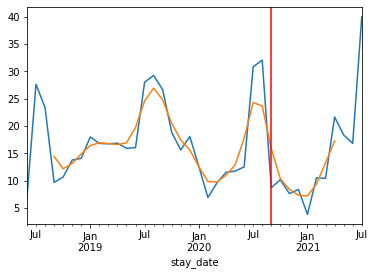

In [ ]:
import matplotlib.pyplot as plt
topic_reg[3].plot()
ma[3][0].plot()
plt.axvline(x=topic_reg[3].index[maxs[3]], color='r')

# 전체적인 그래프 개형을 보면 여름에(6-8월) 수영장/사우나 언급하는 빈도가 1년 중 가장 크게 언급함.
# 하지만 코로나 이전 2019 겨울에 호텔 부대시설 언급 빈도가 코로나 이후 겨울과 차이가 크다. 
# 코로나 시작점인 2020 1월과 그 다음해 1월에는 코로나가 심해져서 부대시설을 이용할 수 없게 된 것이 언급빈도에 영향을 미쳤을 것

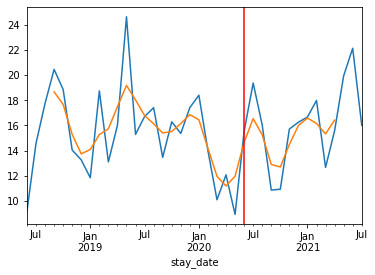

In [ ]:
import matplotlib.pyplot as plt
topic_reg[4].plot()
ma[4][0].plot()
plt.axvline(x=topic_reg[4].index[maxs[4]], color='r')

# 코로나 이전에는 월별 언급 비율 비슷 
# 코로나 이후도 코로나 시작 직후를 제외하고는 언급 비율은 비슷하지만  코로나 이전보다 topic4 언급 비율 평균 줄어듦.
# 2020 1월 코로나 시작 이후 급격히 줄어든 이유는 호텔 이용객들이 급격히 줄었기 때문이고 
# 호텔 직원의 미소  코로나 이후 직원들 마스크 쓰고 있어서 보기 어려움
# 호텔 비대면 체크인 서비스로 인해 기존에 로비에서 직원의 안내를 받는 고객이 줄어듦


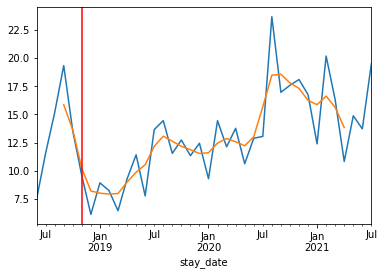

In [ ]:
import matplotlib.pyplot as plt
topic_reg[5].plot()
ma[5][0].plot()
plt.axvline(x=topic_reg[5].index[maxs[5]], color='r')

# 

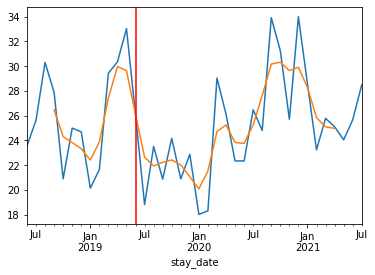

In [ ]:
import matplotlib.pyplot as plt
topic_reg[6].plot()
ma[6][0].plot()
plt.axvline(x=topic_reg[6].index[maxs[6]], color='r')

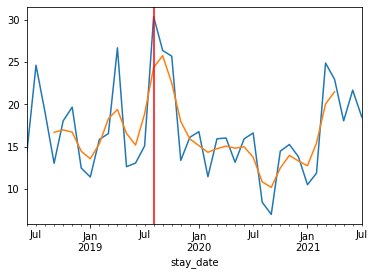

In [ ]:
import matplotlib.pyplot as plt
topic_reg[7].plot()
ma[7][0].plot()
plt.axvline(x=topic_reg[7].index[maxs[7]], color='r')

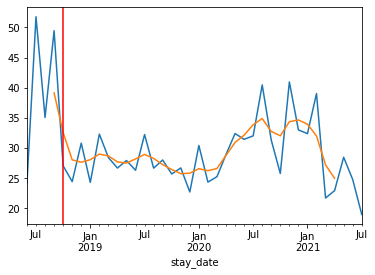

In [ ]:
import matplotlib.pyplot as plt
topic_reg[8].plot()
ma[8][0].plot()
plt.axvline(x=topic_reg[8].index[maxs[8]], color='r')

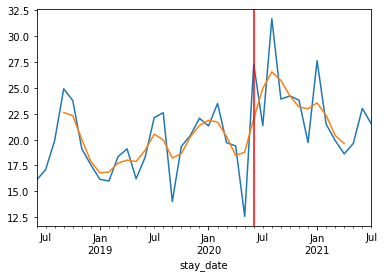

In [ ]:
import matplotlib.pyplot as plt
topic_reg[9].plot()
ma[9][0].plot()
plt.axvline(x=topic_reg[9].index[maxs[9]], color='r')